In [126]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
from highlight_text import fig_text
import pandas as pd
import numpy as np

from PIL import Image
import urllib
import os


In [127]:
# --- Read and transform the data

df = pd.read_excel('C:/Users/lione/Documents/Entrainement _logiciels/Python/Bayern_MGladbach_xGOT.xlsx')
df['Min'] = df['Min'].astype(int)
df['xGOT'] = df['xGOT'].astype(float)

df

,Team_ID,Team_Name,Min,xGOT,Event_Type,Team_color,Match_ID,Venue
0,9823,Bayern,1,0.27,S,#dc052d,3903571,H
1,9823,Bayern,12,0.15,S,#dc052d,3903571,H
2,9823,Bayern,25,0.03,S,#dc052d,3903571,H
3,9823,Bayern,38,0.15,S,#dc052d,3903571,H
4,9823,Bayern,42,0.01,S,#dc052d,3903571,H
5,9823,Bayern,48,0.48,S,#dc052d,3903571,H
6,9823,Bayern,60,0.10,S,#dc052d,3903571,H
7,9823,Bayern,61,0.44,S,#dc052d,3903571,H
8,9823,Bayern,61,0.85,S,#dc052d,3903571,H
9,9823,Bayern,64,0.80,S,#dc052d,3903571,H


In [157]:


# ----------------------------------------------------------------
# Function to plot the xG match axes

def plot_axes_xg_by_match(ax, fig, match_id, data=df):
    '''
    This function plots the xGOT lollipop chart for a given match
    id.
    '''
    df = data.copy()
    match_df = df[df['Match_ID'] == match_id].reset_index(drop=True)
    match_df.sort_values(by='Min', ascending=True).reset_index(drop=True)

    home_conditional = (match_df['Venue'] == 'H')
    away_conditional = (match_df['Venue'] == 'A')

    # -- Clean up the axes
    ax.set_ylim(-1.05,1.05)
    ax.set_xlim(-5,95)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks(
        [x for x in range(-2,45,10)] + [x for x in range(52,102,10)],
        labels=[x for x in range(0,91,10)]
    )
    
    ax.spines['bottom'].set_color('black') # Couleur de l'axe des abscisses
    
    
    ax.tick_params(labelsize=7, colors='black') # Couleur des valeurs (graduation))

    
    plt.rcParams['hatch.linewidth'] = 0.45  # taille des hachures
    
    
    
   
    
    
    

    home_color = match_df[home_conditional]['Team_color'].iloc[0]
    away_color = match_df[away_conditional]['Team_color'].iloc[0]
    for index, shot in enumerate(match_df[home_conditional]['xGOT']):
        ec_ = home_color
        marker = 'o'
        minute = match_df[home_conditional]['Min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        if match_df[home_conditional]['Event_Type'].iloc[index] != 'G':
            hatch = ''
            ax.scatter([minute + offset_x], [shot + .000025], marker=marker, s=80, hatch=hatch, 
            color="white", zorder=3, lw=1.15, ec=ec_)
        
        #---------Si l'équipe à domicile marque----------------
        
        else:
            hatch = '/////////////'
            #if match_df[home_conditional]['isOwnGoal'].iloc[index]:
              #  shot = -1*shot
               # ec_ = away_color
               # marker = '^'
            ax.scatter([minute + offset_x], [shot + .00025], marker=marker, s=160, hatch=hatch, 
                color="white", zorder=4, lw=1.15, ec=ec_) # fond du cercle lorque l'équipe à domicle marque
        ax.plot([minute + offset_x, minute + offset_x], [0, shot], color=ec_, zorder=2)

    for index, shot in enumerate(match_df[away_conditional]['xGOT']):
        ec_ = away_color
        marker = 'o'
        minute = match_df[away_conditional]['Min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        if match_df[away_conditional]['Event_Type'].iloc[index] != 'G':
            hatch = ''
            
            # distance entre le cercle et le trait
            ax.scatter([minute + offset_x], [-1*shot - .000025], marker=marker, s=80, hatch=hatch, 
                color="white", zorder=3, lw=1.15, ec=ec_)
        
        #------------Si l'équipe extérieure marque--------------------
        else: 
            hatch = '/////////////'
            #if match_df[away_conditional]['isOwnGoal'].iloc[index]:
                #shot = -1*shot
               # ec_ = home_color
                #marker = 'v'
            ax.scatter([minute + offset_x], [-1*shot - 0.001], marker=marker, s=160, hatch=hatch, 
                color="white", zorder=4, lw=1.15, ec=ec_)  # hachure du fond du cercle pour l'équipe extérieure
        ax.plot([minute + offset_x, minute + offset_x], [0, -1*shot], color=ec_, zorder=2)

    # --------------------------------- Make it pretty -----------------------------------------------------
    
    #----------- axe horizontal-----------
    ax.plot([-5,95], [0,0], color='white', lw=1.75) 
    
    #------- barre verticale (mi-temps)---------------
    ax.plot([45,45], [-1.05,1.05], color='white', lw=1.75, zorder=2)  
    
    #-------------fond partie du haut (équipe domicile)--------
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[1.05],
        color=home_color, alpha=0.1, zorder=1,
        hatch="......."
    )
    
     #-------------fond partie du bas (équipe extérieure)--------
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[-1.05],
        color=away_color, alpha=0.1, zorder=1,
        hatch="......."
    )

    # --- Add the logos and legend ---
    home_team_id = match_df[home_conditional]['Team_ID'].iloc[0]
    away_team_id = match_df[away_conditional]['Team_ID'].iloc[0]
    home_team_name = match_df[home_conditional]['Team_Name'].iloc[0]
    away_team_name = match_df[away_conditional]['Team_Name'].iloc[0]

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

    ax_coords = DC_to_NFC([-2, .55])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{home_team_id:.0f}.png')) #.convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    ax_coords = DC_to_NFC([-2, -.9])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{away_team_id:.0f}.png')) #.convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    # --- Compute goals and xG
    home_xGOT = match_df[home_conditional]['xGOT'].sum()  # match_df[home_conditional & (match_df['isOwnGoal'] == False)]['xGOT'].sum()
    away_xGOT = match_df[away_conditional]['xGOT'].sum()   # //
    home_goals = (match_df[home_conditional]['Event_Type'] == 'G').sum() #+ (match_df[away_conditional]['Event_Type'] == 'G').sum()
    away_goals = (match_df[away_conditional]['Event_Type'] == 'G').sum() #+ (match_df[home_conditional]['Event_Type'] == 'G').sum()

    
    
    # afficher au-dessus de la figure, la confrontation + xGOT + résulat final
    #ax.annotate(     
     #   xy=(0.2, 1),
      #  text=f'{home_team_name} ({home_xGOT:.1f}) vs. {away_team_name} ({away_xGOT:.1f}):\n{home_goals} - {away_goals}',
      #  xycoords='axes fraction',
       # weight='bold',
     #   size=9,
       # color = 'red'
    #)
    
    
    
    

    # Partie logo
     # # ---- The League's logo
        
        # Pour avoir le lien, rechercher sur Google league + logo + fotmob puis clique droit "Copier le lien de l'image"
    league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/54.png"))  #.convert("LA")
    league_ax = fig.add_axes([0.125, .97, 0.05, 0.05], zorder=1)
    league_ax.imshow(league_icon)
    league_ax.axis("off")

    
    fig_text(
    x = 0.2, y = .98, 
    s = f"Bundesliga Round 4 | {home_team_name} ({home_xGOT:.1f}) vs. {away_team_name} ({away_xGOT:.1f}) : {home_goals} - {away_goals}",
    # highlight_textprops=[{"style":"italic"}],
    va = "bottom", ha = "left",
    fontsize = 18, color = "red", weight = "bold"
    )

    return ax

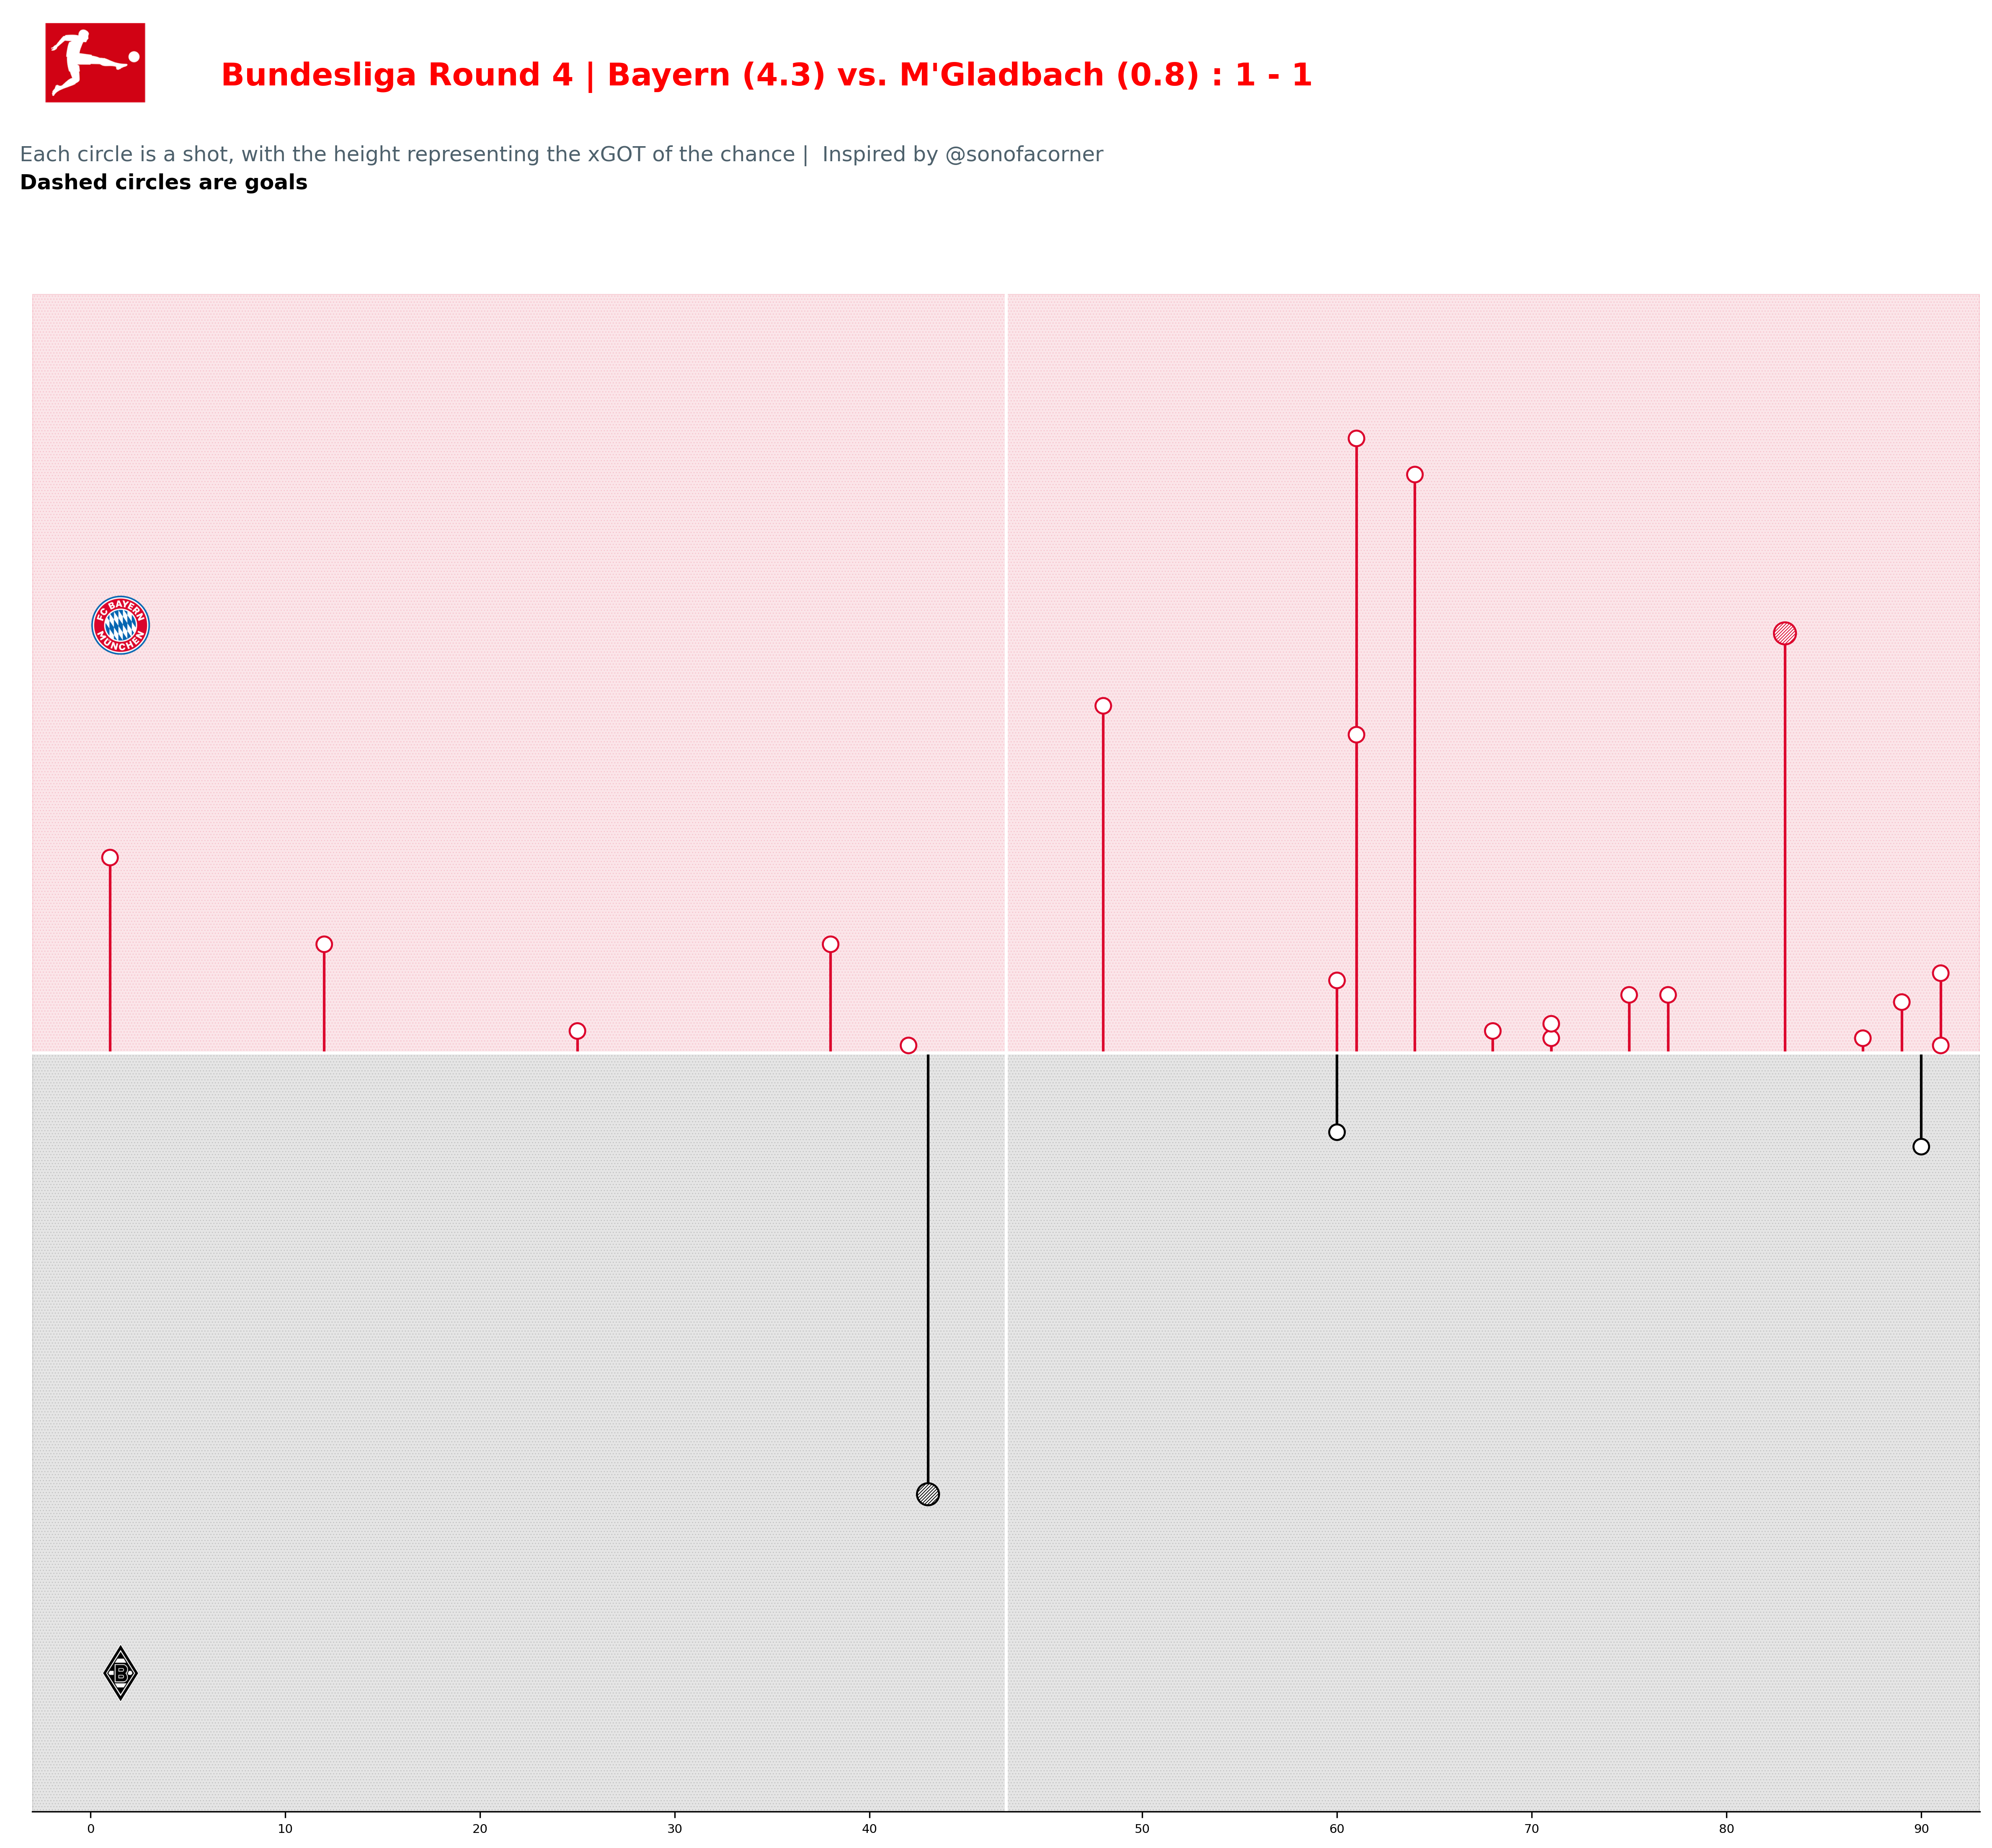

In [158]:
# --- The Final Visual

layout_ = '''
    AABBCC
   
'''

height_ratios = [1]

f = plt.figure(figsize=(20,16), dpi=300)
ax = plt.subplot()
#axs = f.subplot_mosaic(
 #   layout_, 
   # gridspec_kw={
     #   'height_ratios':height_ratios,
  #      'hspace': 0.35
  #  }
#)


#ax.imshow(cat, extent=[0, 10, 0, 18], aspect='auto',   cmap='gray',alpha=0.75)
#ax.imshow(dog, extent=[10, 20, 0, 18], aspect='auto', cmap='gray',alpha=0.75)

#counter = 0
df = df.sort_values(by='Match_ID').reset_index(drop=True)
#matches = list(df['Match_ID'].unique())
#for k, ax in axs.items():
   # match_id = matches[counter]
plot_axes_xg_by_match(ax, f, match_id=df['Match_ID'], data=df) # plot_axes_xg_by_match(ax, f, match_id=match_id, data=df)
   # counter += 1


#fig_text(
 #   x = 0.12, y = .98, 
  #  s = f"Bundesliga Round 4",
    # highlight_textprops=[{"style":"italic"}],
 #   va = "bottom", ha = "left",
 #   fontsize = 18, color = "black", weight = "bold"
#)


fig_text(
	x = 0.12, y = .93, 
    s = "Each circle is a shot, with the height representing the xGOT of the chance |  Inspired by @sonofacorner\n<Dashed circles are goals>",  #and triangles are own goals>.",
    #highlight_textprops=[{"weight": "bold", "color": "black"}],
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C"
)

plt.savefig(
	"C:/Users/lione/Documents/Entrainement _logiciels/Python/Figures/Lollipop_Chart_Bayern_4.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

#plt.savefig(
#	"C:/Users/lione/Documents/Entrainement _logiciels/Python/Lollipop_Chart.png",
#	dpi = 600,
#	facecolor = "none",
#	bbox_inches="tight",
#   edgecolor="none",
#	transparent = True
#)